In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math
import plotly.graph_objects as go
import copy

# problem 1

In [427]:
def create_date_time(df):
    date = []
    year = []
    month = []
    day = []
    for i in range(len(df)):
        try:
            datetime_object = datetime.strptime(df.iloc[i]['Date'], '%Y-%m-%d %H:%M:%S')
        except:
            datetime_object = datetime.strptime(df.iloc[i]['Date'], '%d/%m/%y %H:%M')
        date.append(datetime_object)
        year.append(datetime_object.year)
        month.append(datetime_object.month)
        day.append(datetime_object.day)
    df['date_time'] = date
    df['Year'] = year
    df['Month'] = month
    df['Day'] = day
    return df

In [428]:
bitcoin_data = pd.read_csv('coin_Bitcoin.csv',index_col=0)

In [429]:
bitcoin_data.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [430]:
type(bitcoin_data.iloc[0]['Date'])

str

In [431]:
bitcoin_data = create_date_time(bitcoin_data)

In [432]:
quant = []
for i in range(len(bitcoin_data)):
    if i == 0:
        quant.append(None)
    else:
        if(bitcoin_data.iloc[i]['date_time'] - bitcoin_data.iloc[i-1]['date_time'] == timedelta(days = 1)):
            quant.append(bitcoin_data.iloc[i]['Low'] - bitcoin_data.iloc[i-1]['Low'])
        else:
            quant.append(None)

In [433]:
bitcoin_data['Quantum'] = quant

In [434]:
bitcoin_data.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,date_time,Year,Month,Day,Quantum
SNo,,,,,,,,,,,,,,
1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29 23:59:59,2013,4,29,NaN
2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30 23:59:59,2013,4,30,0.050003
3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01 23:59:59,2013,5,1,-26.330002
4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02 23:59:59,2013,5,2,-15.438103
5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03 23:59:59,2013,5,3,-13.181900


In [435]:
bitcoin_data.tail()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,date_time,Year,Month,Day,Quantum
SNo,,,,,,,,,,,,,,
2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02 23:59:59,2021,7,2,-113.100446
2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03 23:59:59,2021,7,3,632.015756
2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04 23:59:59,2021,7,4,993.780921
2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,2021-07-05 23:59:59,2021,7,5,-1182.816424
2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11,2021-07-06 23:59:59,2021,7,6,386.255135


In [436]:
first_month = bitcoin_data.iloc[0]['Month']
last_month = bitcoin_data.iloc[-1]['Month']

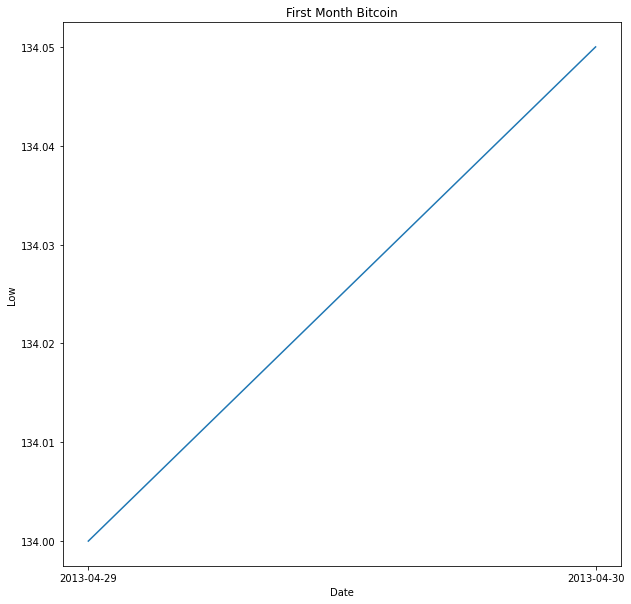

In [437]:
x = []
y = []
for i in range(len(bitcoin_data)):
    if bitcoin_data.iloc[i]['Month'] == first_month:
        y.append(bitcoin_data.iloc[i]['Low'])
        x.append(bitcoin_data.iloc[i]['Date'][0:10])
    else:
        break
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('First Month Bitcoin')

plt.savefig('First_Month_Bitcoin'+".pdf")
plt.show()

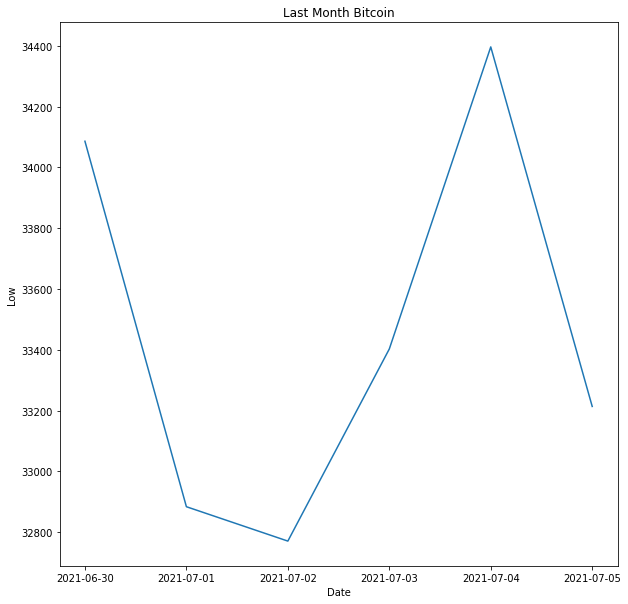

In [438]:
x = []
y = []
l = len(bitcoin_data)
for i in range(l):
    if bitcoin_data.iloc[l-i-1]['Month'] == last_month:
        y.append(bitcoin_data.iloc[l-i-2]['Low'])
        x.append(bitcoin_data.iloc[l-i-2]['Date'][0:10])
    else:
        break
x.reverse()
y.reverse()
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('Last Month Bitcoin')
plt.savefig('Last_Month_Bitcoin'+".pdf")
plt.show()

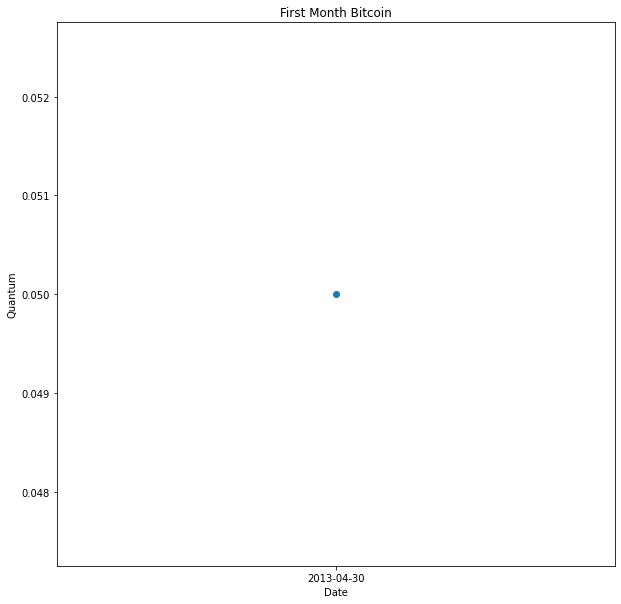

In [439]:
x = []
y = []
for i in range(len(bitcoin_data)):
    if bitcoin_data.iloc[i]['Month'] == first_month:
        if not math.isnan(bitcoin_data.iloc[i]['Quantum']):
            y.append(bitcoin_data.iloc[i]['Quantum'])
            x.append(bitcoin_data.iloc[i]['Date'][0:10])
    else:
        break

plt.figure(figsize=(10,10))
if len(y) == 1:
    plt.scatter(x,y)
else:
    plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Quantum')
plt.title('First Month Bitcoin')

plt.savefig('First_Month_Bitcoin_quantum'+".pdf")
plt.show()

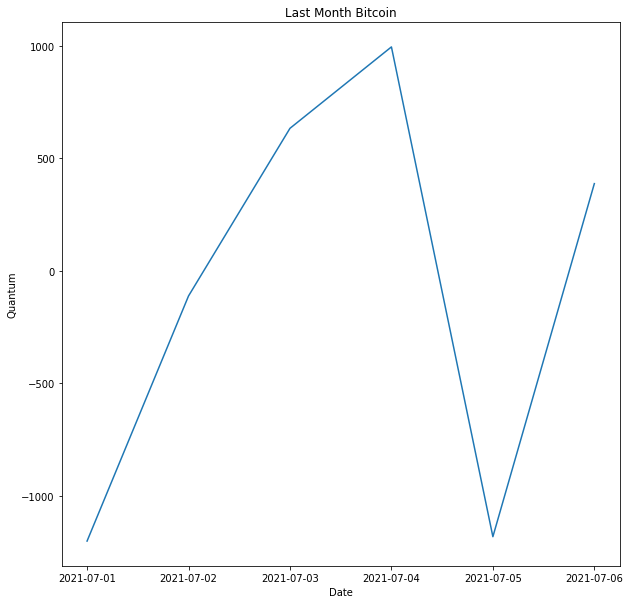

In [440]:
x = []
y = []
l = len(bitcoin_data)
for i in range(l):
    if bitcoin_data.iloc[l-i-1]['Month'] == last_month:
        if not math.isnan(bitcoin_data.iloc[l-i-1]['Quantum']):
            y.append(bitcoin_data.iloc[l-i-1]['Quantum'])
            x.append(bitcoin_data.iloc[l-i-1]['Date'][0:10])
    else:
        break
x.reverse()
y.reverse()
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Quantum')
plt.title('Last Month Bitcoin')
plt.savefig('last_Month_Bitcoin_quantum'+".pdf")
plt.show()

# problem 2

In [441]:
eth_data = pd.read_csv('coin_Ethereum.csv',index_col=0)
D_t = []
for i in range(1, len(eth_data)+1):
    datetime_object = datetime.strptime(eth_data.Date[i][:6]+'20'+eth_data.Date[i][6:8], "%d/%m/%Y")
    D_t.append(datetime_object)
eth_data['date_time'] = D_t

In [442]:
def draw_graph(x,y,x_lab='x-axis',y_lab = 'y-axis',title= 'graph'):
    plt.figure(figsize=(10,10))
    plt.plot(x,y)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.savefig(title+".pdf")
    plt.show()

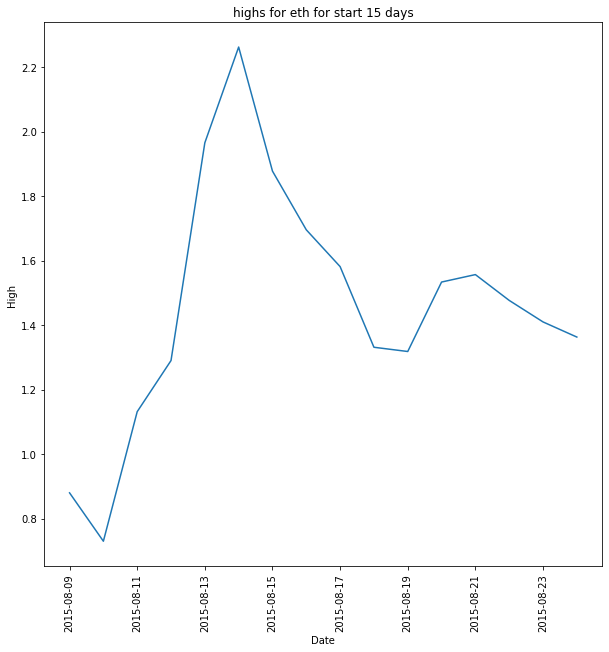

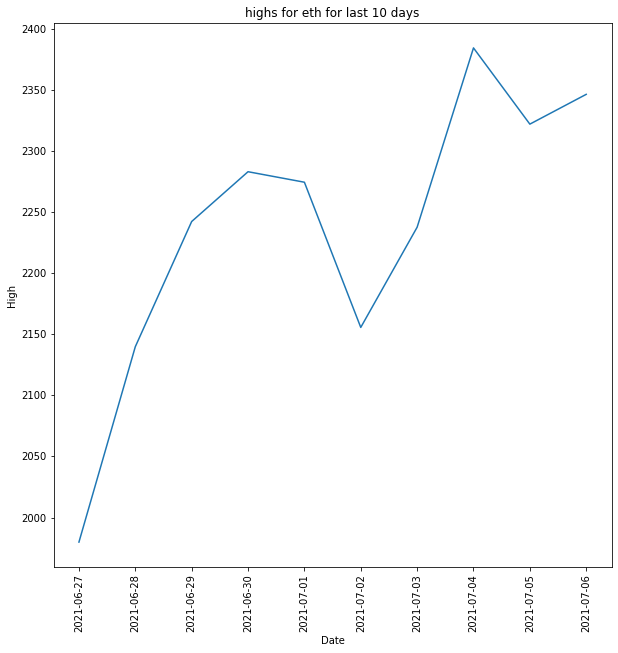

In [443]:
strt_date = min(eth_data.date_time)
end_date = max(eth_data.date_time)

first_15 = []
last_10 = []
for i in range(1, len(eth_data)):
    d = (eth_data.date_time[i]-strt_date).days
    if (d > -1) and (d < 16):
        first_15.append(eth_data.iloc[i])
    e = (end_date-eth_data.date_time[i]).days
    if (e > -1) and (e < 11):
        last_10.append(eth_data.iloc[i])

first_15 = pd.DataFrame(first_15)
last_10 = pd.DataFrame(last_10)
draw_graph(x = list(first_15['date_time']),y = list(first_15.High),x_lab = 'Date',y_lab = 'High',title = 'highs for eth for start 15 days')
draw_graph(x = list(last_10['date_time']),y = list(last_10.High),x_lab = 'Date',y_lab = 'High',title = 'highs for eth for last 10 days')


# problem 3 & 5 

In [444]:
def mvng_avg_graph(data,title = 'None'):
    day1 = datetime.strptime("2020-01-01", "%Y-%m-%d")
    day2 = datetime.strptime("2020-01-31", "%Y-%m-%d")

    L = []
    for i in range(1, len(data)):
        d = (data.date_time[i]-day1).days
        e = (day2-data.date_time[i]).days
        if (d > -6) and (e > 0):
            L.append(data.iloc[i])
    
    if len(L) == 0:
        L = pd.DataFrame(columns=list(data.columns))
    else:
        L = pd.DataFrame(L)
    

    L['Volume1'] = L['Volume'].rolling(5).mean()
    L.dropna(inplace=True) 
    
    plt.figure(figsize=(10,10))
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Volume') 
    plt.title(title)

    plt.plot(L.date_time, L.Volume, color = 'blue')

    plt.plot(L.date_time, L.Volume1, color = 'green') 
    plt.legend(["Volume", "Moving Average"],bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.savefig(title+'_'+'moving_averges'+".pdf")

    plt.show()

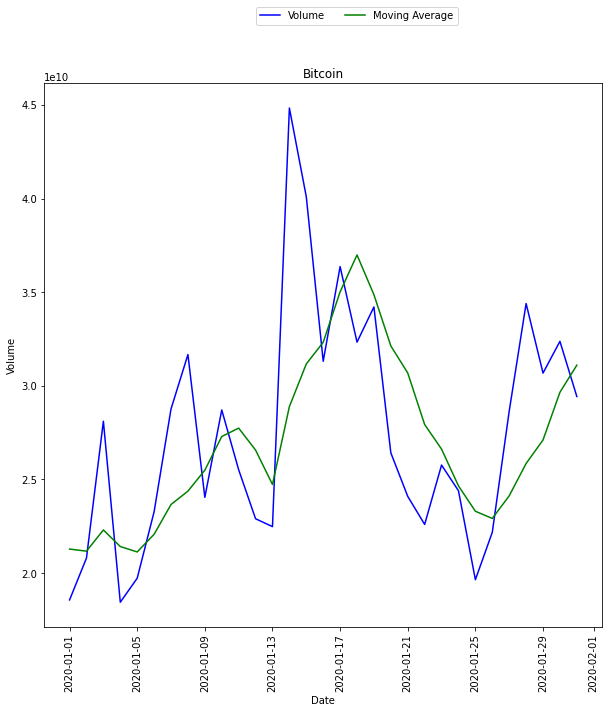

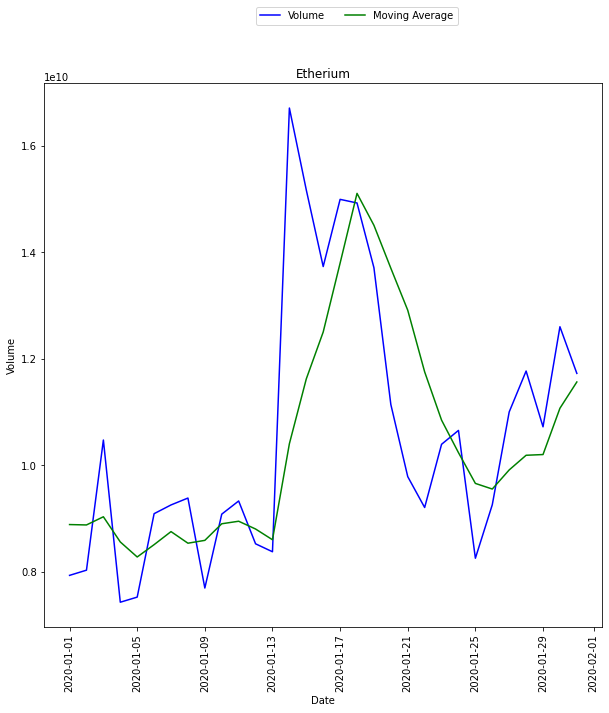

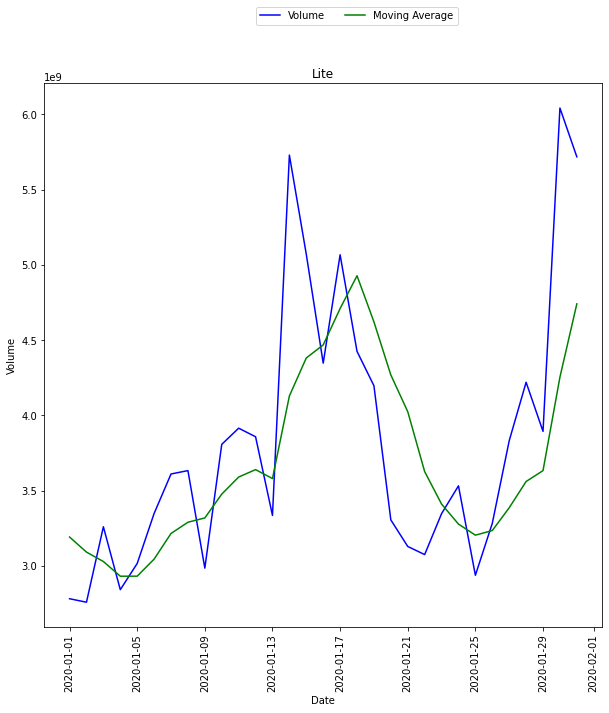

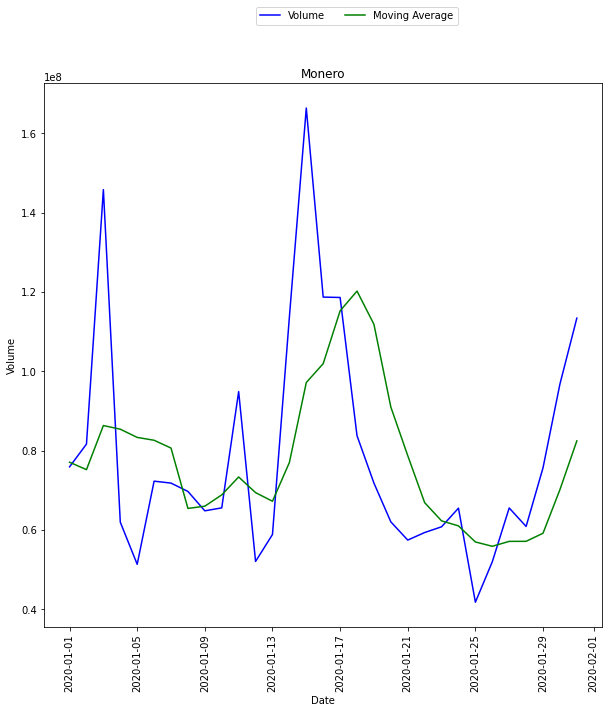

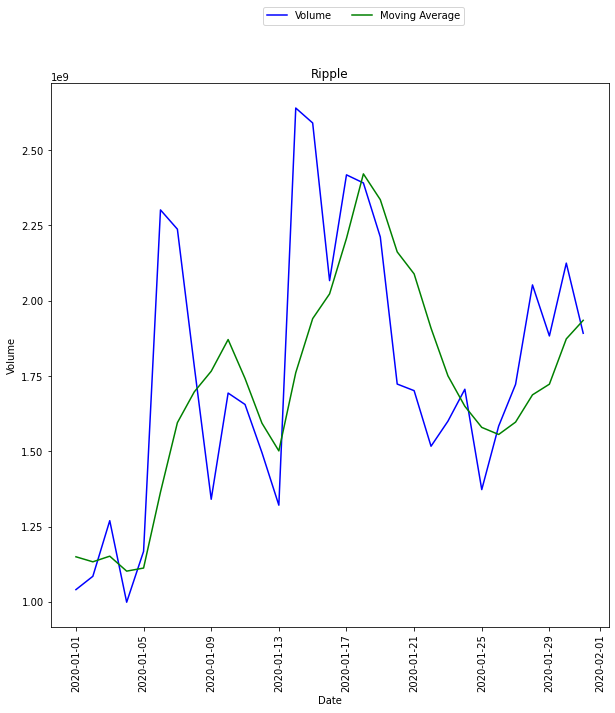

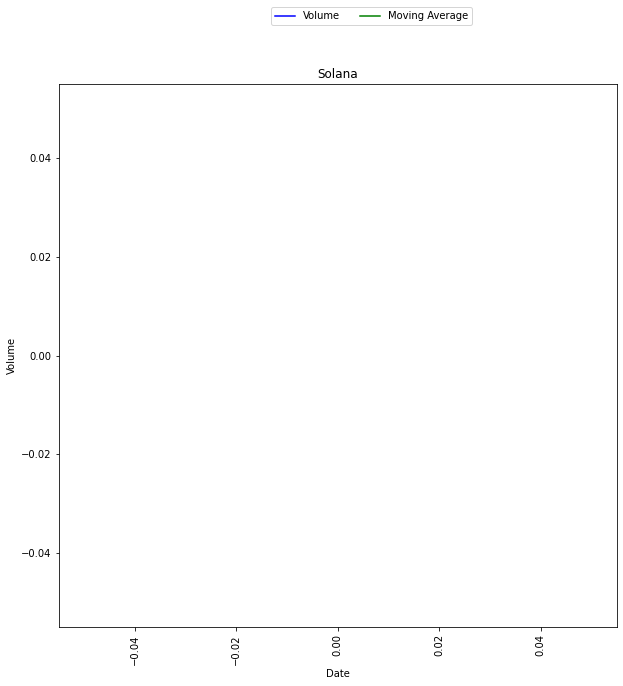

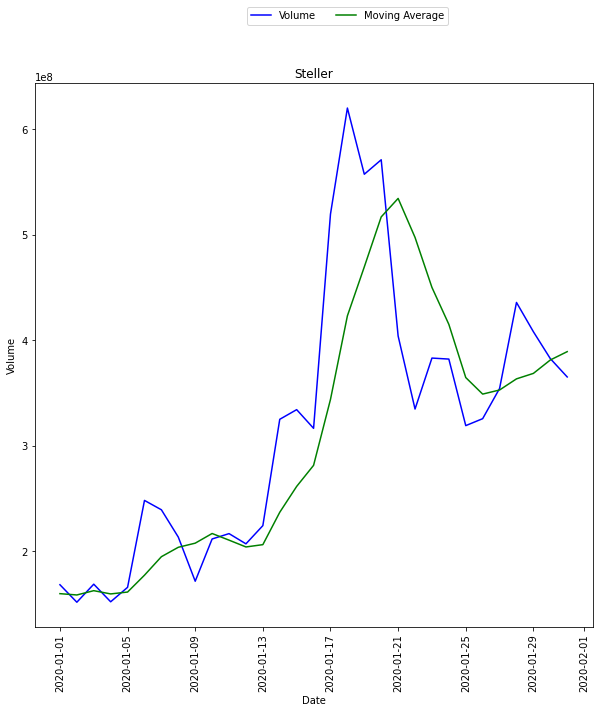

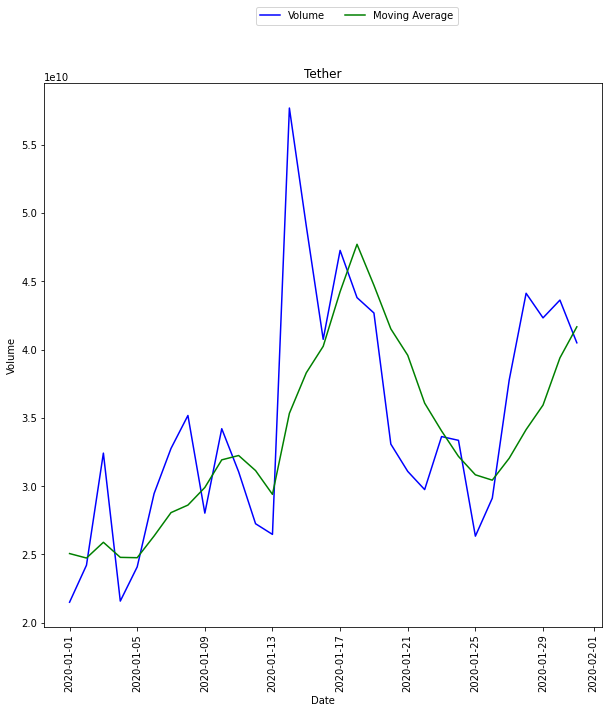

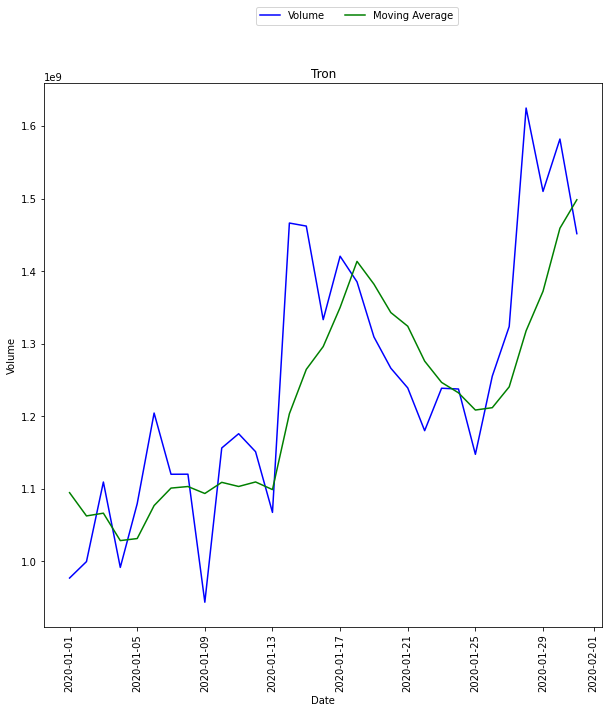

In [445]:
data = []
bitcoin_data = pd.read_csv('coin_Bitcoin.csv',index_col=0)
D_t = []
for i in range(1,len(bitcoin_data)+1):
    datetime_object = datetime.strptime(bitcoin_data.Date[i][:10], "%Y-%m-%d")
    D_t.append(datetime_object)
    if bitcoin_data.Volume[i] > 0 and len(data) == 0:
        data.append(bitcoin_data.iloc[i])
bitcoin_data['date_time'] = D_t
mvng_avg_graph(bitcoin_data,'Bitcoin')

eth_data = pd.read_csv('coin_Ethereum.csv',index_col=0)
D_t = []
for i in range(1, len(eth_data)+1):
    datetime_object = datetime.strptime(eth_data.Date[i][:6]+'20'+eth_data.Date[i][6:8], "%d/%m/%Y")
    D_t.append(datetime_object)
    if eth_data.Volume[i] > 0 and len(data)== 1:
        data.append(eth_data.iloc[i])
eth_data['date_time'] = D_t
mvng_avg_graph(eth_data,'Etherium')

litecoin_data = pd.read_csv('coin_Litecoin.csv',index_col=0)
D_t = []
for i in range(1,len(litecoin_data)+1):
    datetime_object = datetime.strptime(litecoin_data.Date[i][:10], "%Y-%m-%d")
    D_t.append(datetime_object)
    if litecoin_data.Volume[i] > 0 and len(data)== 2:
        data.append(litecoin_data.iloc[i])
litecoin_data['date_time'] = D_t
mvng_avg_graph(litecoin_data,'Lite')

monero_data = pd.read_csv('coin_Monero.csv',index_col=0)
D_t = []
for i in range(1,len(monero_data)+1):
    datetime_object = datetime.strptime(monero_data.Date[i][:10], "%Y-%m-%d")
    D_t.append(datetime_object)
    if monero_data.Volume[i] > 0 and len(data)== 3:
        data.append(monero_data.iloc[i])
monero_data['date_time'] = D_t
mvng_avg_graph(monero_data,'Monero')

ripple_data = pd.read_csv('coin_Ripple.csv',index_col=0)
D_t = []
for i in range(1,len(ripple_data)+1):
    datetime_object = datetime.strptime(ripple_data.Date[i][:6]+'20'+ripple_data.Date[i][6:8], "%d/%m/%Y")
    D_t.append(datetime_object)
    if ripple_data.Volume[i] > 0 and len(data)== 4:
        data.append(ripple_data.iloc[i])
ripple_data['date_time'] = D_t
mvng_avg_graph(ripple_data,'Ripple')

solana_data = pd.read_csv('coin_Solana.csv',index_col=0)
D_t = []
for i in range(1,len(solana_data)+1):
    datetime_object = datetime.strptime(solana_data.Date[i][:10], "%Y-%m-%d")
    D_t.append(datetime_object)
    if solana_data.Volume[i] > 0 and len(data)== 5:
        data.append(solana_data.iloc[i])
solana_data['date_time'] = D_t
mvng_avg_graph(solana_data,'Solana')

stellar_data = pd.read_csv('coin_Stellar.csv',index_col=0)
D_t = []
for i in range(1,len(stellar_data)+1):
    datetime_object = datetime.strptime(stellar_data.Date[i][:10], "%Y-%m-%d")
    D_t.append(datetime_object)
    if stellar_data.Volume[i] > 0 and len(data)== 6:
        data.append(stellar_data.iloc[i])
stellar_data['date_time'] = D_t
mvng_avg_graph(stellar_data,'Steller')

tether_data = pd.read_csv('coin_Tether.csv',index_col=0)
D_t = []
for i in range(1,len(tether_data)+1):
    datetime_object = datetime.strptime(tether_data.Date[i][:10], "%Y-%m-%d")
    D_t.append(datetime_object)
    if tether_data.Volume[i] > 0 and len(data)== 7:
        data.append(tether_data.iloc[i])
tether_data['date_time'] = D_t
mvng_avg_graph(tether_data,'Tether')

tron_data = pd.read_csv('coin_Tron.csv',index_col=0)
D_t = []
for i in range(1,len(tron_data)+1):
    datetime_object = datetime.strptime(tron_data.Date[i][:10], "%Y-%m-%d")
    D_t.append(datetime_object)
    if tron_data.Volume[i] > 0 and len(data)== 8:
        data.append(tron_data.iloc[i])
tron_data['date_time'] = D_t
mvng_avg_graph(tron_data,'Tron')


In [446]:
data = pd.DataFrame(data)
pf = copy.deepcopy(data)
pf.rename(columns = {'Date':'Initial sale Date'}, inplace = True)
pf = pf.reset_index()
pf.drop('index', inplace = True, axis = 1)
pf

,Name,Symbol,Initial sale Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,BTC,2013-12-28 23:59:59,747.059998,705.349976,737.979980,727.830017,3.250580e+07,8.869919e+09
1,Ethereum,ETH,09/08/15 23:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,Litecoin,LTC,2013-12-28 23:59:59,23.223301,21.929300,23.194700,22.562700,1.100370e+07,5.495832e+08
3,Monero,XMR,2014-05-23 23:59:59,3.434370,2.051040,2.051040,2.963020,2.668520e+05,2.692180e+06
4,Ripple,XRP,28/12/13 23:59,0.028106,0.026629,0.027554,0.027303,1.434040e+05,2.134534e+08
5,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.000000e+00
6,Stellar,XLM,2014-08-07 23:59:59,0.003042,0.002455,0.002686,0.002501,1.428640e+05,1.079148e+06
7,Tether,USDT,2015-03-02 23:59:59,0.607890,0.568314,0.571249,0.606502,3.032500e+00,1.525959e+05
8,TRON,TRX,2017-09-15 23:59:59,0.001831,0.001091,0.001419,0.001801,2.647480e+04,0.000000e+00


# problem 4

In [447]:
ethereum_data = create_date_time(pd.read_csv('coin_Ethereum.csv',index_col=0))
litecoin_data = create_date_time(pd.read_csv('coin_Litecoin.csv',index_col=0))
monero_data = create_date_time(pd.read_csv('coin_Monero.csv',index_col=0))
ripple_data = create_date_time(pd.read_csv('coin_Ripple.csv',index_col=0))
solana_data = create_date_time(pd.read_csv('coin_Solana.csv',index_col=0))
stellar_data = create_date_time(pd.read_csv('coin_Stellar.csv',index_col=0))
tether_data = create_date_time(pd.read_csv('coin_Tether.csv',index_col=0))
tron_data = create_date_time(pd.read_csv('coin_Tron.csv',index_col=0))
bitcoin_data = create_date_time(pd.read_csv('coin_bitcoin.csv',index_col=0))

In [448]:
labels = ['Bitcoin','Ethereum','Litecoin','Monero','Ripple','Solana','Stellar','Tether','Tron']

In [449]:
day1 = datetime(2020, 4, 1)
day2 = datetime(2021, 4, 1)

In [450]:
y1 = []
try:
    y1.append(bitcoin_data.loc[(bitcoin_data['Year'] == day1.year)&(bitcoin_data['Month'] == day1.month)&(bitcoin_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(ethereum_data.loc[(ethereum_data['Year'] == day1.year)&(ethereum_data['Month'] == day1.month)&(ethereum_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(litecoin_data.loc[(litecoin_data['Year'] == day1.year)&(litecoin_data['Month'] == day1.month)&(litecoin_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(monero_data.loc[(monero_data['Year'] == day1.year)&(monero_data['Month'] == day1.month)&(monero_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(ripple_data.loc[(ripple_data['Year'] == day1.year)&(ripple_data['Month'] == day1.month)&(ripple_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(solana_data.loc[(solana_data['Year'] == day1.year)&(solana_data['Month'] == day1.month)&(solana_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(stellar_data.loc[(stellar_data['Year'] == day1.year)&(stellar_data['Month'] == day1.month)&(stellar_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(tether_data.loc[(tether_data['Year'] == day1.year)&(tether_data['Month'] == day1.month)&(tether_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)
try:
    y1.append(tron_data.loc[(tron_data['Year'] == day1.year)&(tron_data['Month'] == day1.month)&(tron_data['Day'] == day1.day)]['Marketcap'].iloc[0])
except:
    y1.append(0)

In [451]:
y2 = []
try:
    y2.append(bitcoin_data.loc[(bitcoin_data['Year'] == day2.year)&(bitcoin_data['Month'] == day2.month)&(bitcoin_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(ethereum_data.loc[(ethereum_data['Year'] == day2.year)&(ethereum_data['Month'] == day2.month)&(ethereum_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(litecoin_data.loc[(litecoin_data['Year'] == day2.year)&(litecoin_data['Month'] == day2.month)&(litecoin_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(monero_data.loc[(monero_data['Year'] == day2.year)&(monero_data['Month'] == day2.month)&(monero_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(ripple_data.loc[(ripple_data['Year'] == day2.year)&(ripple_data['Month'] == day2.month)&(ripple_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(solana_data.loc[(solana_data['Year'] == day2.year)&(solana_data['Month'] == day2.month)&(solana_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(stellar_data.loc[(stellar_data['Year'] == day2.year)&(stellar_data['Month'] == day2.month)&(stellar_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(tether_data.loc[(tether_data['Year'] == day2.year)&(tether_data['Month'] == day2.month)&(tether_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)
try:
    y2.append(tron_data.loc[(tron_data['Year'] == day2.year)&(tron_data['Month'] == day2.month)&(tron_data['Day'] == day2.day)]['Marketcap'].iloc[0])
except:
    y2.append(0)

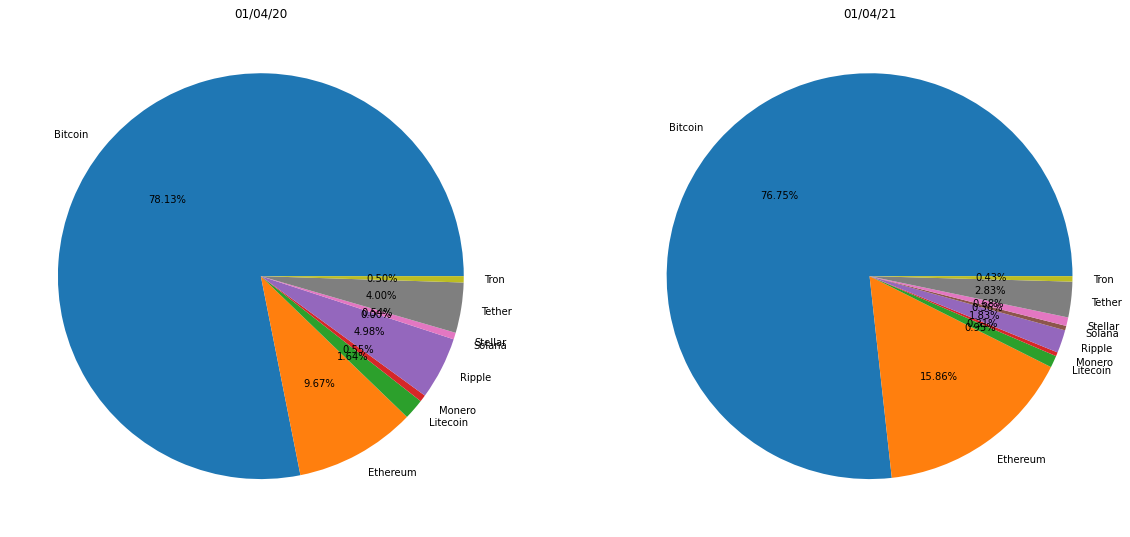

In [452]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,20))
ax1.pie(y1, labels = labels, autopct='%1.2f%%')
ax1.set_title('01/04/20')
ax2.pie(y2, labels = labels, autopct='%1.2f%%')
ax2.set_title('01/04/21')

plt.savefig('MarketCap_piechart'+".pdf")
plt.show()

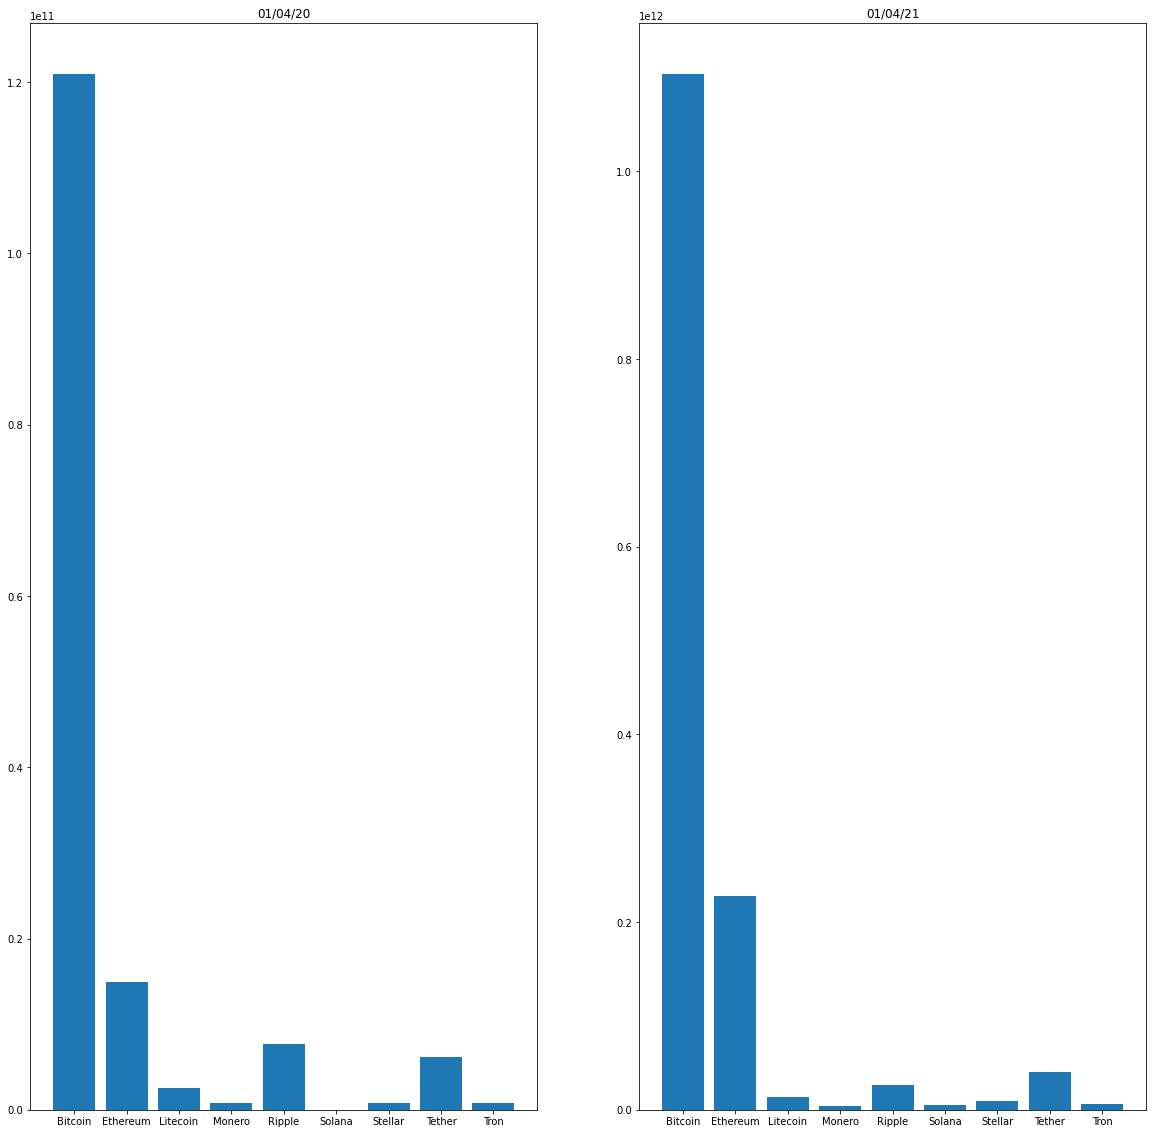

In [453]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,20))
ax1.bar(labels,y1)
ax1.set_title('01/04/20')
ax2.bar(labels,y2)
ax2.set_title('01/04/21')

plt.savefig('MarketCap_bargraph'+".pdf")
plt.show()

# problem 6

In [454]:
bitcoin_data.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,date_time,Year,Month,Day
SNo,,,,,,,,,,,,,
1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29 23:59:59,2013,4,29
2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30 23:59:59,2013,4,30
3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01 23:59:59,2013,5,1
4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02 23:59:59,2013,5,2
5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03 23:59:59,2013,5,3


In [455]:
def candle_plot(df,title):
    fig = go.Figure(data=[go.Candlestick(x=df['date_time'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])
    fig.update_layout(
        title=title,
        yaxis_title= df.iloc[0]['Symbol'] + ' Stock'
    )

    fig.show()

In [456]:
candle_plot(bitcoin_data,"Bitcoin")
candle_plot(ethereum_data,"Ethereum")
candle_plot(litecoin_data,"Litecoin")
candle_plot(monero_data,"Monero")
candle_plot(ripple_data,"Ripple")
candle_plot(solana_data,"Solana")
candle_plot(stellar_data,"Stellar")
candle_plot(tether_data,"Tether")
candle_plot(tron_data,"Tron")

In [457]:
years = list(bitcoin_data['Year'].unique())
years = list(set(years) & set(ethereum_data['Year'].unique()))
years = list(set(years) & set(litecoin_data['Year'].unique()))
years = list(set(years) & set(monero_data['Year'].unique()))
years = list(set(years) & set(ripple_data['Year'].unique()))
years = list(set(years) & set(solana_data['Year'].unique()))
years = list(set(years) & set(stellar_data['Year'].unique()))
years = list(set(years) & set(tether_data['Year'].unique()))
years = list(set(years) & set(tron_data['Year'].unique()))
print(years)

[2020, 2021]


In [458]:
y = []
y.append(bitcoin_data.loc[bitcoin_data['Year'] == 2020]['Marketcap'].mean())
y.append(ethereum_data.loc[ethereum_data['Year'] == 2020]['Marketcap'].mean())
y.append(litecoin_data.loc[litecoin_data['Year'] == 2020]['Marketcap'].mean())
y.append(monero_data.loc[monero_data['Year'] == 2020]['Marketcap'].mean())
y.append(ripple_data.loc[ripple_data['Year'] == 2020]['Marketcap'].mean())
y.append(solana_data.loc[solana_data['Year'] == 2020]['Marketcap'].mean())
y.append(stellar_data.loc[stellar_data['Year'] == 2020]['Marketcap'].mean())
y.append(tether_data.loc[tether_data['Year'] == 2020]['Marketcap'].mean())
y.append(tron_data.loc[tron_data['Year'] == 2020]['Marketcap'].mean())

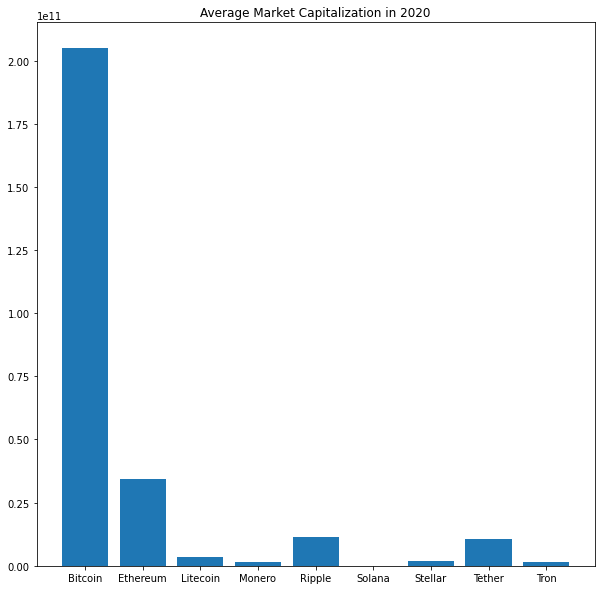

In [459]:
fig,ax= plt.subplots(figsize=(10,10))
ax.bar(labels,y)
ax.set_title('Average Market Capitalization in 2020')

plt.savefig('AVG_MarketCap_bargraph_2020'+".pdf")
plt.show()

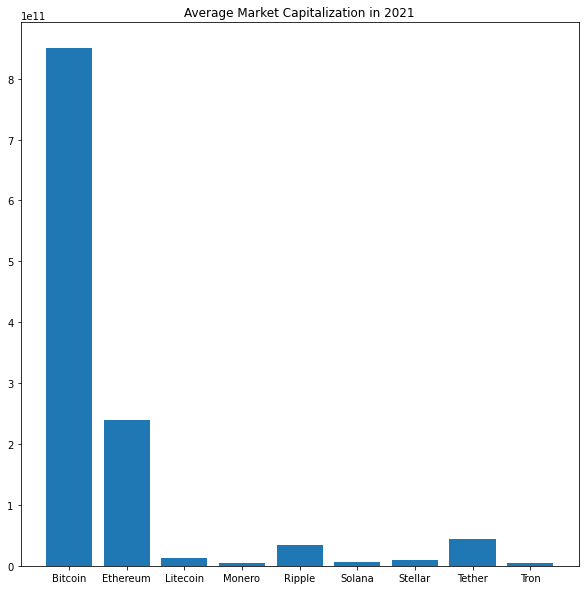

In [460]:
y = []
y.append(bitcoin_data.loc[bitcoin_data['Year'] == 2021]['Marketcap'].mean())
y.append(ethereum_data.loc[ethereum_data['Year'] == 2021]['Marketcap'].mean())
y.append(litecoin_data.loc[litecoin_data['Year'] == 2021]['Marketcap'].mean())
y.append(monero_data.loc[monero_data['Year'] == 2021]['Marketcap'].mean())
y.append(ripple_data.loc[ripple_data['Year'] == 2021]['Marketcap'].mean())
y.append(solana_data.loc[solana_data['Year'] == 2021]['Marketcap'].mean())
y.append(stellar_data.loc[stellar_data['Year'] == 2021]['Marketcap'].mean())
y.append(tether_data.loc[tether_data['Year'] == 2021]['Marketcap'].mean())
y.append(tron_data.loc[tron_data['Year'] == 2021]['Marketcap'].mean())
fig,ax= plt.subplots(figsize=(10,10))
ax.bar(labels,y)
ax.set_title('Average Market Capitalization in 2021')
plt.savefig('AVG_MarketCap_bargraph_2021'+".pdf")
plt.show()

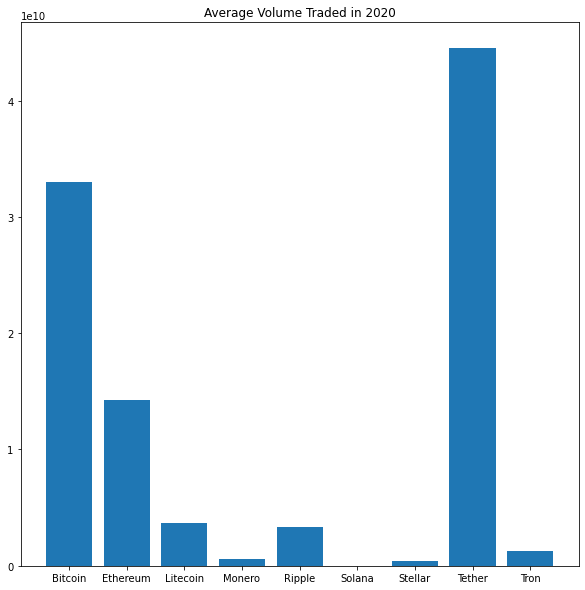

In [461]:
y = []
y.append(bitcoin_data.loc[bitcoin_data['Year'] == 2020]['Volume'].mean())
y.append(ethereum_data.loc[ethereum_data['Year'] == 2020]['Volume'].mean())
y.append(litecoin_data.loc[litecoin_data['Year'] == 2020]['Volume'].mean())
y.append(monero_data.loc[monero_data['Year'] == 2020]['Volume'].mean())
y.append(ripple_data.loc[ripple_data['Year'] == 2020]['Volume'].mean())
y.append(solana_data.loc[solana_data['Year'] == 2020]['Volume'].mean())
y.append(stellar_data.loc[stellar_data['Year'] == 2020]['Volume'].mean())
y.append(tether_data.loc[tether_data['Year'] == 2020]['Volume'].mean())
y.append(tron_data.loc[tron_data['Year'] == 2020]['Volume'].mean())
fig,ax= plt.subplots(figsize=(10,10))
ax.bar(labels,y)
ax.set_title('Average Volume Traded in 2020')

plt.savefig('AVG_Vol_traded_bargraph_2020'+".pdf")
plt.show()

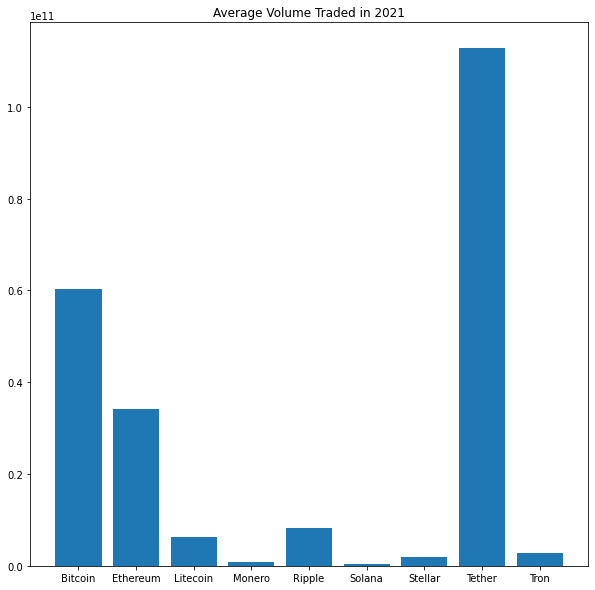

In [462]:
y = []
y.append(bitcoin_data.loc[bitcoin_data['Year'] == 2021]['Volume'].mean())
y.append(ethereum_data.loc[ethereum_data['Year'] == 2021]['Volume'].mean())
y.append(litecoin_data.loc[litecoin_data['Year'] == 2021]['Volume'].mean())
y.append(monero_data.loc[monero_data['Year'] == 2021]['Volume'].mean())
y.append(ripple_data.loc[ripple_data['Year'] == 2021]['Volume'].mean())
y.append(solana_data.loc[solana_data['Year'] == 2021]['Volume'].mean())
y.append(stellar_data.loc[stellar_data['Year'] == 2021]['Volume'].mean())
y.append(tether_data.loc[tether_data['Year'] == 2021]['Volume'].mean())
y.append(tron_data.loc[tron_data['Year'] == 2021]['Volume'].mean())
fig,ax= plt.subplots(figsize=(10,10))
ax.bar(labels,y)
ax.set_title('Average Volume Traded in 2021')
plt.savefig('AVG_Vol_traded_bargraph_2021'+".pdf")
plt.show()

# problem 7 

In [463]:
def _graph(data, year, title):
    data = pd.DataFrame(data)
    plt.figure(figsize=(10,10))
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Close') 
    plt.title(title + " "+ str(year))

    plt.scatter(data.date_time, data.Volume, c = 'blue')
    plt.savefig(title+ "_"+ str(year)+'_'+'close'+".pdf")

    plt.show()

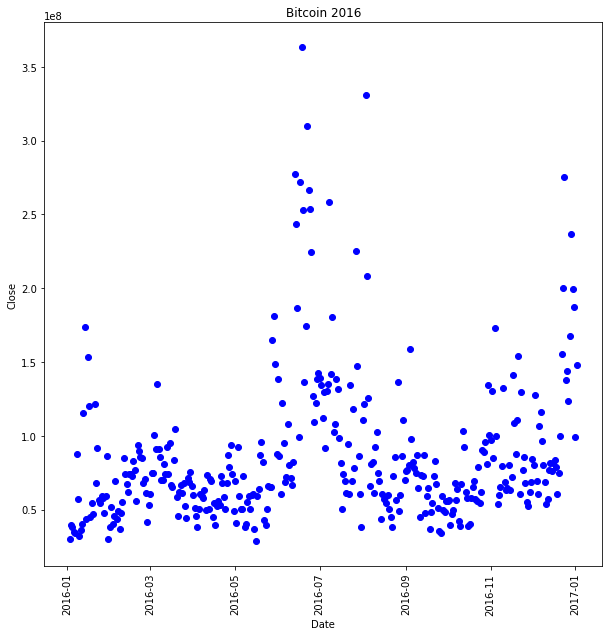

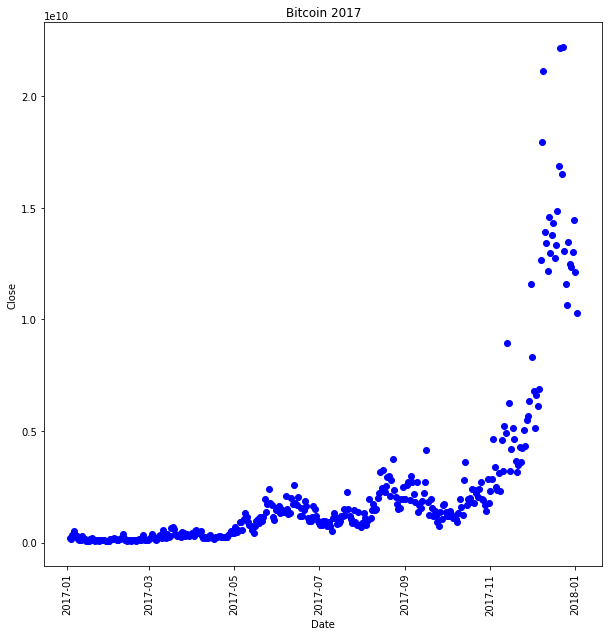

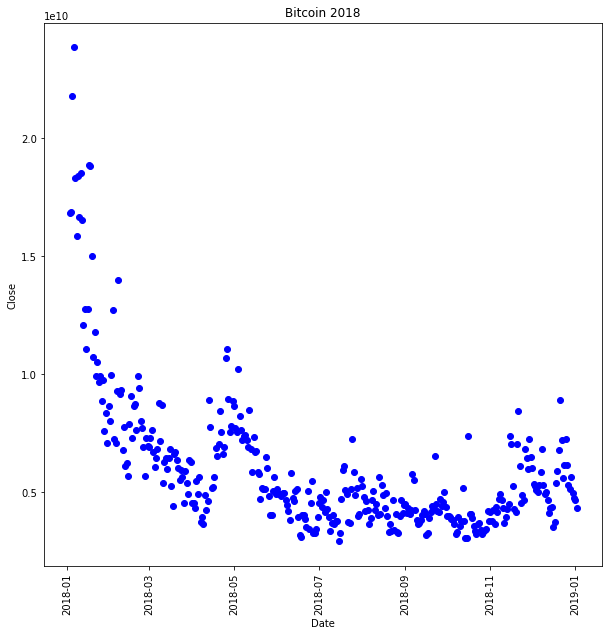

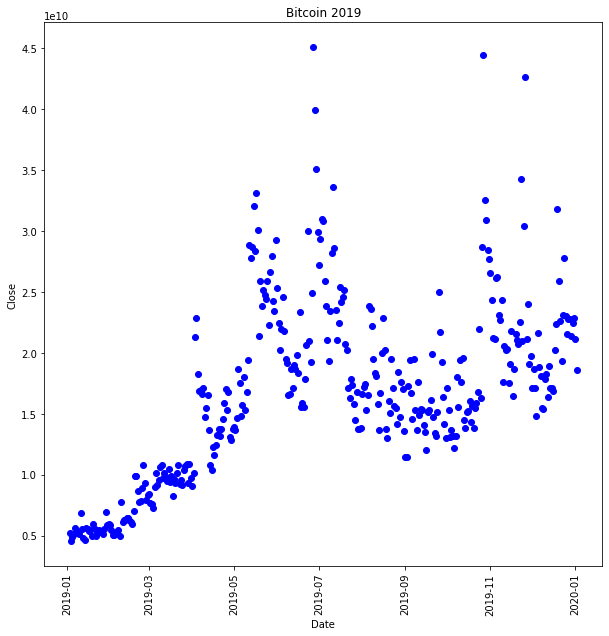

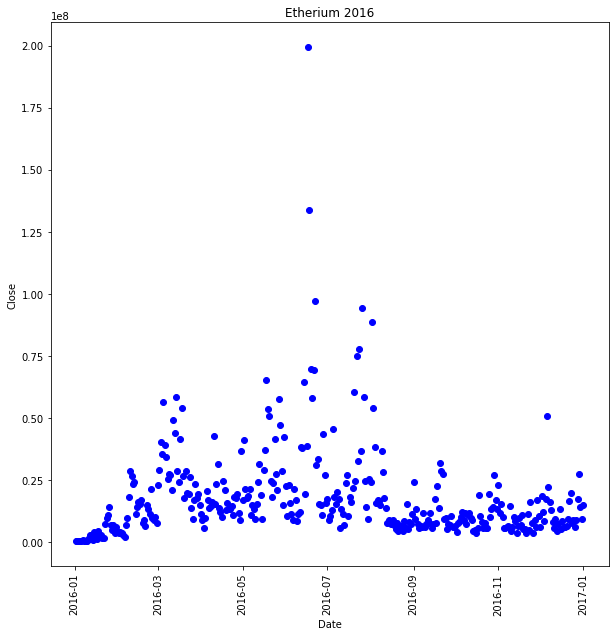

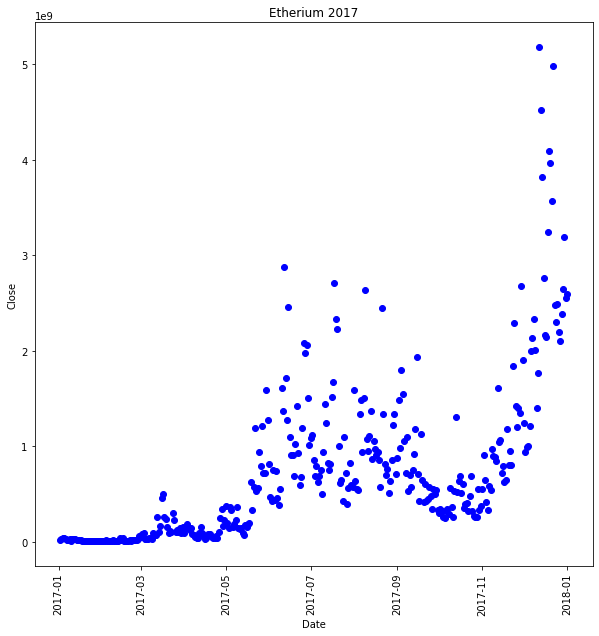

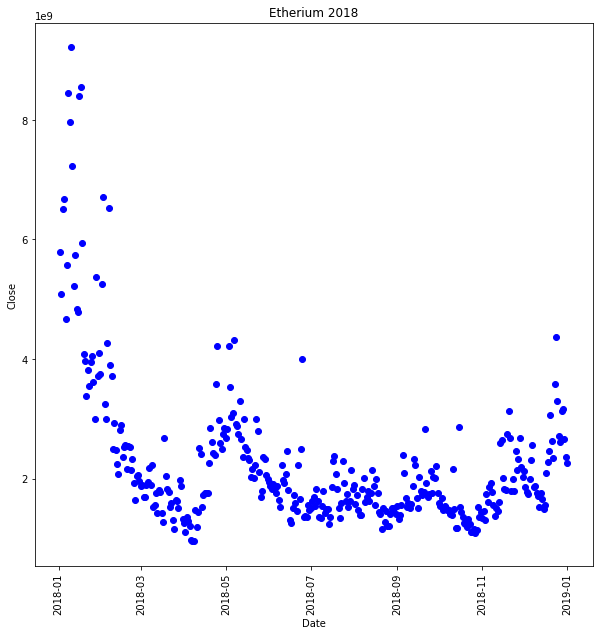

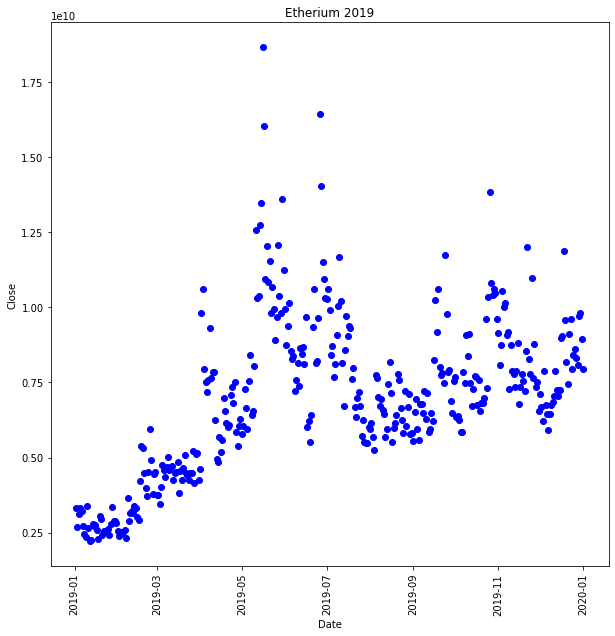

In [464]:
ETH_2016 = []
ETH_2017 = []
ETH_2018 = []
ETH_2019 = []
BIT_2016 = []
BIT_2017 = []
BIT_2018 = []
BIT_2019 = []


for i in range(1,len(bitcoin_data)+1):
    if bitcoin_data.date_time[i].year == 2016:
        BIT_2016.append(bitcoin_data.iloc[i])
    if bitcoin_data.date_time[i].year == 2017:
        BIT_2017.append(bitcoin_data.iloc[i])
    if bitcoin_data.date_time[i].year == 2018:
        BIT_2018.append(bitcoin_data.iloc[i])
    if bitcoin_data.date_time[i].year == 2019:
        BIT_2019.append(bitcoin_data.iloc[i])
    
_graph(BIT_2016,2016,'Bitcoin')
_graph(BIT_2017,2017,'Bitcoin')
_graph(BIT_2018,2018,'Bitcoin')
_graph(BIT_2019,2019,'Bitcoin')
    

for i in range(1, len(eth_data)+1):
    if eth_data.date_time[i].year == 2016:
        ETH_2016.append(eth_data.iloc[i])
    if eth_data.date_time[i].year == 2017:
        ETH_2017.append(eth_data.iloc[i])
    if eth_data.date_time[i].year == 2018:
        ETH_2018.append(eth_data.iloc[i])
    if eth_data.date_time[i].year == 2019:
        ETH_2019.append(eth_data.iloc[i])
_graph(ETH_2016,2016,'Etherium')
_graph(ETH_2017,2017,'Etherium')
_graph(ETH_2018,2018,'Etherium')
_graph(ETH_2019,2019,'Etherium')